## Required Imports ##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split as tts

data = pd.read_csv("project1.data")

## Exploratory Analysis (Part 1) ##

In [2]:
data.info()
data.shape
# Shape and Size of the data set!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


(398, 9)

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


The horsepower column isn't shown in describe() because it is an object Dtype but it should be an integer Dtype!! So let's change that!!

In [5]:
for i, row in data[data['horsepower'] == '?'].iterrows():
    data.loc[[i],['horsepower']] = str(0)
data['horsepower'] = data['horsepower'].astype(str).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


After changing the '?' value to '0' instead we were able to change the Dtype as well!!

In [6]:
print(data.duplicated().any())
print(data.isnull().values.any())

False
False


There are no duplicated nor null cells!!

In [7]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


The horsepower and acceleration column descriptions have decently larger 
standard deviations in comparison to the others.
I am predicting there are to be outliers in those columns respectively.

In [8]:
data['origin'].unique()

array([1, 3, 2])

Seeing as there are only 3 options to choose from for the origin we can perform one-hot encoding!!

In [19]:
data['origin'] = data['origin'].astype("category")
data = pd.get_dummies(data, columns=["origin"], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
 8   origin_2      398 non-null    bool   
 9   origin_3      398 non-null    bool   
dtypes: bool(2), float64(4), int64(3), object(1)
memory usage: 25.8+ KB


Now the origin column became a category and we just transformed it to one-hot encoding by removing the dummy varaibles!!


In [31]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,False,False


# Uni/Multivariate Analysis

Horsepower unique value numbers: 94


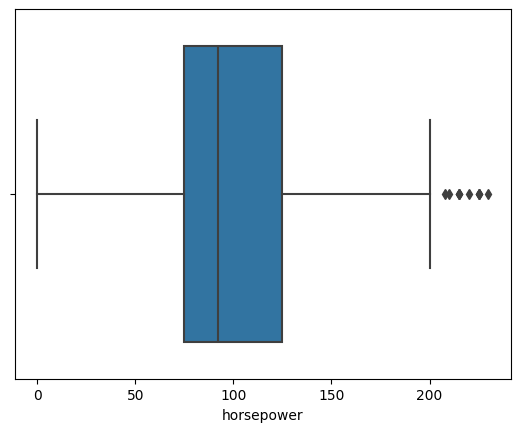

In [83]:
print('Horsepower unique value numbers: ' + str(data['horsepower'].nunique()))
sns.boxplot(data, x='horsepower')
plt.show()

Acceleration unique value numbers: 95


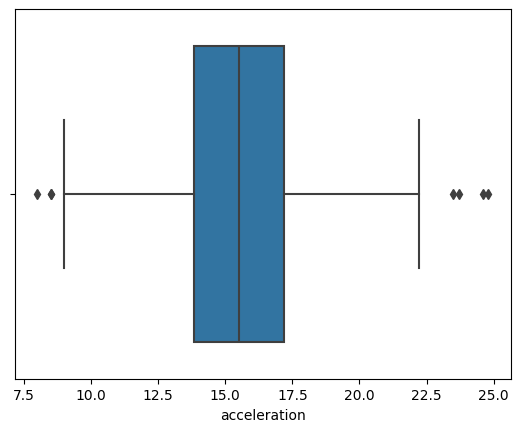

In [82]:
print('Acceleration unique value numbers: ' + str(data['acceleration'].nunique()))
sns.boxplot(data, x='acceleration')
plt.show()

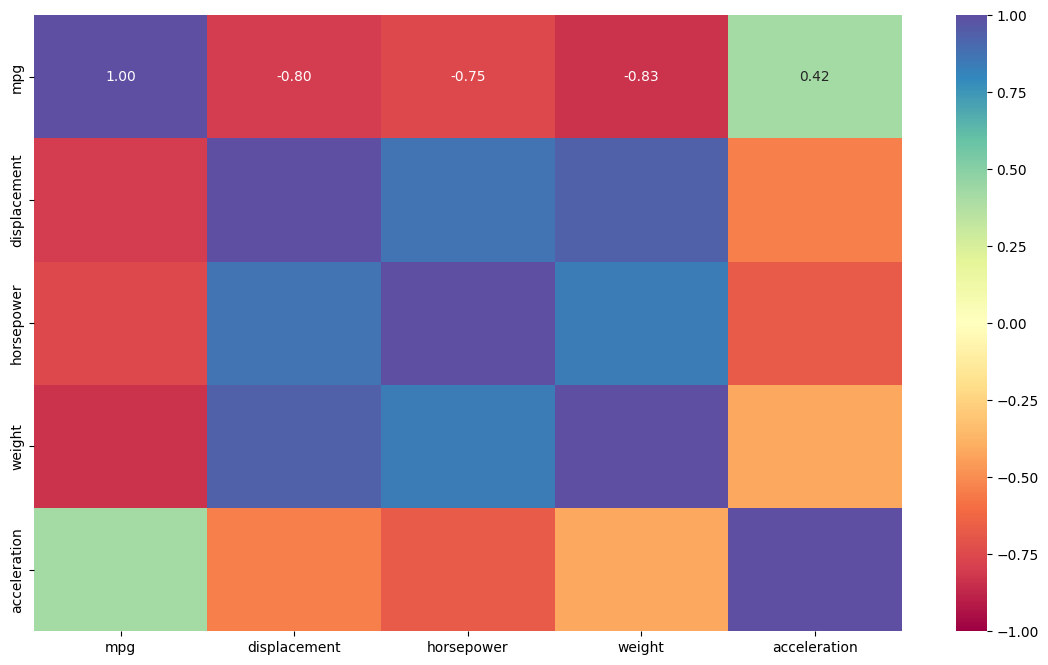

In [23]:
corr_cols=['mpg','displacement','horsepower','weight','acceleration']

# increate the figure size
plt.figure(figsize=(14, 8))

# the actual heat map
sns.heatmap(
   data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# show the plot
plt.show()

The 'mpg' and 'acceleration' seem to have more correlation with each other than anything else. Although the 'displacement', 'horsepower', and 'weight' have a better correlation amongst each other.
The weight, horsepower, and displacement seem to affect the efficiency of the mpg negatively while the acceleration does the opposite.

# Regression Modeling (Part 2)

In [61]:
X1 = data.drop('mpg',axis=1)
X = X1.drop('car_name',axis=1)
Y = data["mpg"]
print(X.shape)
print(Y.shape)

(398, 8)
(398,)


In [62]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.3, random_state=1)

data_lr = lm.LinearRegression()
datasc = data_lr.fit(X_train,Y_train)

In [63]:
dataY_predict = data_lr.predict(X_test)

In [64]:
print(X_test.shape)
print(Y_test.shape)

(120, 8)
(120,)


In [67]:
print(data_lr.score(X_train, Y_train))
print(data_lr.score(X_test, Y_test))

0.8134399204354177
0.8452190244999926


Pretty high, and they are close in accuracy to one another but because there are so many different variables that are taken into account its hard to predict new values with 100% accuracy. But overall I think this is pretty good analysis.